<a href="https://colab.research.google.com/github/Meenakshi-here/SalesPrediction-using-Python/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
add = pd.DataFrame(pd.read_csv("/content/Advertising.csv"))
add.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


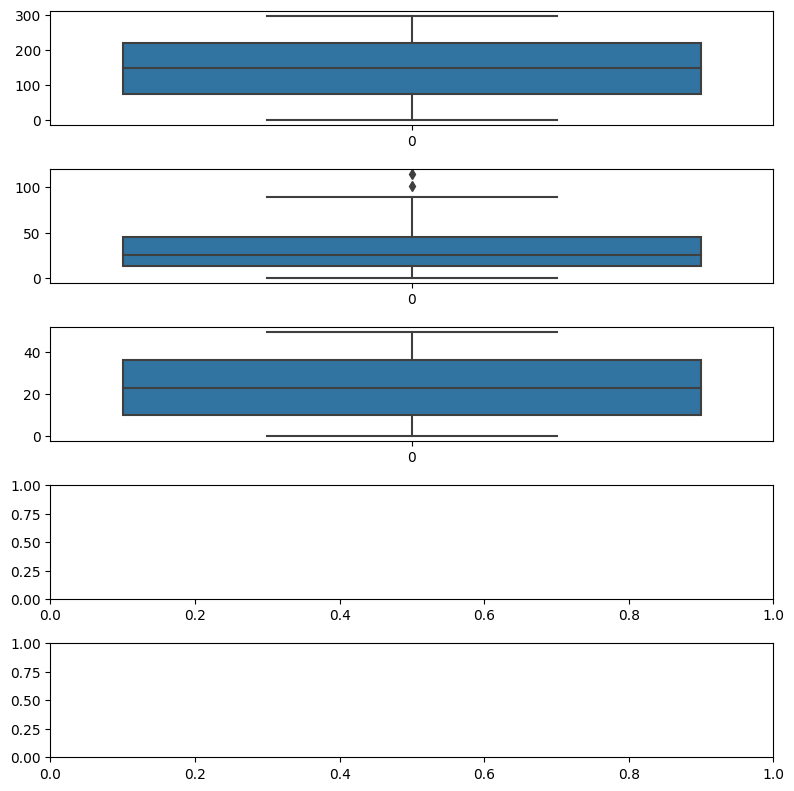

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(5, figsize = (8,8))
plt1 = sns.boxplot(add['TV'], ax = axs[0])
plt2 = sns.boxplot(add['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(add['Radio'], ax = axs[2])
plt.tight_layout()

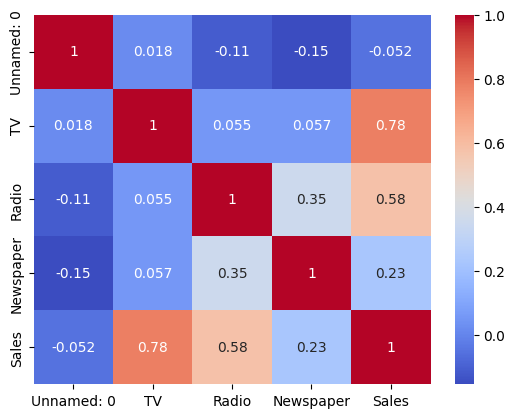

In [ ]:
sns.heatmap(add.corr(), cmap="coolwarm", annot = True)
plt.show()

In [ ]:
M=add['Radio']
N=add['Sales']


In [ ]:
from sklearn.model_selection import train_test_split
M_train, M_test, N_train, N_test = train_test_split(M, N, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Add a constant to get an intercept
M_train_sm = sm.add_constant(M_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(N_train, M_train_sm).fit()

lr.params

const    9.247973
Radio    0.201073
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     60.51
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.54e-12
Time:                        10:15:51   Log-Likelihood:                -411.70
No. Observations:                 140   AIC:                             827.4
Df Residuals:                     138   BIC:                             833.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2480      0.709     13.036      0.0

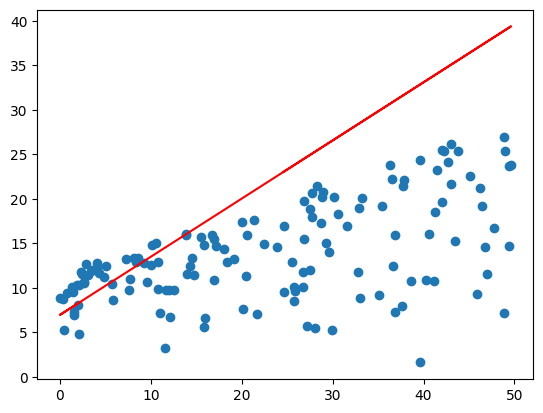

In [ ]:
plt.scatter(M_train, N_train)
plt.plot(M_train, 6.948 + 0.654*M_train, 'r')
plt.show()

In [ ]:
N_train_pred = lr.predict(M_train_sm)
res = (N_train - N_train_pred)

In [ ]:
M_test_sm = sm.add_constant(M_test)
N_pred = lr.predict(M_test_sm)

In [ ]:
np.sqrt(mean_squared_error(N_test, N_pred))
r_squared = r2_score(N_test, N_pred)
r_squared

0.4207007355904727